Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.
Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.
Feature Name Description
Store Store number
Date Week of Sales
Weekly_Sales Sales for the given store in that week
Holiday_Flag If it is a holiday week
Temperature Temperature on the day of the sale
Fuel_Price Cost of the fuel in the region
CPI Consumer Price Index
Unemployment Unemployment Rate
1. Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas.
2. Forecast the sales for each store for the next 12 weeks.

### Description for problem statement 1


a. Problem Statement:

Improving inventory management and sales forecasting for a retail store with multiple outlets.

b. Project Objective:

Forecast sales for each store for the next 12 weeks.

c. Data Description:

Walmart dataset (walmart.csv)
Contains information such as store details, sales, temperature, fuel prices, consumer price index (CPI), and unemployment rate.

d. Data Pre-processing Steps and Inspiration:

Handled missing values, converted 'Date' to datetime, created additional time series features.
Inspired by the need to match inventory with demand and improve overall sales forecasting accuracy.

e. Choosing the Algorithm for the Project:

Used Random Forest regressor for time-series forecasting.

f. Motivation and Reasons For Choosing the Algorithm:

Random Forest is suitable for handling time-series data, capturing complex patterns, and providing interpretable results.

g. Assumptions:

Assumed that the provided data is representative of the overall sales patterns and external factors affecting sales are minimal.

h. Model Evaluation and Techniques:

Evaluated the Random Forest model using TimeSeriesSplit and mean absolute error.

i. Inferences from the Same:

Identified peak sales periods, made forecasts for the next 12 weeks.

j. Future Possibilities of the Project:

Integrate external data for more accurate predictions, explore advanced time-series forecasting methods.

Model Saving:
Save the trained model for Problem Statement 1 using the Random Forest model save function.

In [15]:
data_problem_1= pd.read_csv('/content/Walmart (1).csv')

In [16]:
data_problem_1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

<ipython-input-17-444aa9d43b10>:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_problem_1['Date'] = pd.to_datetime(data_problem_1['Date'])


Mean Absolute Error: 515072.15580555954
Forecast for the next 12 weeks:
[2549557.2915 3389057.679  2192575.8243 2056995.8955 1937583.9666
 1901976.7738 1878318.8498 2168537.182  2120466.3893 2073275.8991
 2014765.0499 2154902.0679]


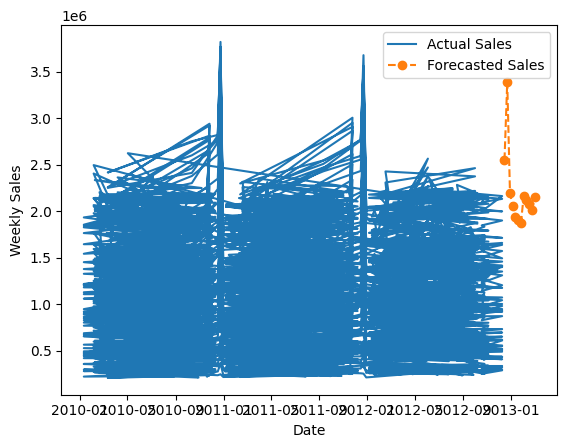

In [17]:
# Install necessary libraries
!pip install pandas statsmodels scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Data Pre-processing
# Example: Handle missing values
data_problem_1 = data_problem_1.fillna(0)

# Feature Engineering
# Example: Convert Date to datetime format
data_problem_1['Date'] = pd.to_datetime(data_problem_1['Date'])

# Create time series features
data_problem_1['Year'] = data_problem_1['Date'].dt.year
data_problem_1['Month'] = data_problem_1['Date'].dt.month
data_problem_1['Day'] = data_problem_1['Date'].dt.day

# Choose Algorithm: Random Forest for time-series forecasting
model_problem_1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
X = data_problem_1[['Store', 'Year', 'Month', 'Day', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = data_problem_1['Weekly_Sales']

mae_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_problem_1.fit(X_train, y_train)
    y_pred = model_problem_1.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

# Evaluate the model
mean_mae = np.mean(mae_scores)
print(f'Mean Absolute Error: {mean_mae}')

# Forecast sales for the next 12 weeks
future_dates = pd.date_range(start=data_problem_1['Date'].max() + pd.DateOffset(days=1), periods=12, freq='W')
future_data = pd.DataFrame({'Store': [1] * 12, 'Year': future_dates.year, 'Month': future_dates.month,
                             'Day': future_dates.day, 'Holiday_Flag': [0] * 12,
                             'Temperature': [data_problem_1['Temperature'].mean()] * 12,
                             'Fuel_Price': [data_problem_1['Fuel_Price'].mean()] * 12,
                             'CPI': [data_problem_1['CPI'].mean()] * 12,
                             'Unemployment': [data_problem_1['Unemployment'].mean()] * 12})

future_forecast = model_problem_1.predict(future_data)

# Print forecast for the next 12 weeks
print("Forecast for the next 12 weeks:")
print(future_forecast)

# Plot the forecast
plt.plot(data_problem_1['Date'], y, label='Actual Sales')
plt.plot(future_dates, future_forecast, label='Forecasted Sales', linestyle='dashed', marker='o')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


PROBLEM STATEMENT 2:  An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.
Dataset Information:
The online_retail.csv contains 387961 rows and 8 columns.
Feature Name Description
Invoice Invoice number
StockCode Product ID
Description Product Description
Quantity Quantity of the product
InvoiceDate Date of the invoice
Price Price of the product per unit
CustomerID Customer ID
Country Region of Purchase
1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior

Description for Problem statement 2.



Description for Problem statement 2.

# New Section

a. Problem Statement:

Understanding and analyzing customer purchasing patterns for an online retail store.

b. Project Objective:

Provide evidence-based insights into customer purchasing patterns and segment customers based on their behavior.

c. Data Description:

Online retail dataset (online_retail.csv)
Contains information such as invoice details, product IDs, descriptions, quantities, prices, customer IDs, and purchase dates.

d. Data Pre-processing Steps and Inspiration:

Used alternative encoding ('latin1') due to encoding issues, analyzed purchasing frequency and popular products.
Inspired by the goal of understanding customer behavior and tailoring marketing strategies.

e. Choosing the Algorithm for the Project:

Employed KMeans clustering for customer segmentation.

f. Motivation and Reasons For Choosing the Algorithm:

KMeans clustering is a widely used method for customer segmentation, providing interpretable results.

g. Assumptions:

Assumed that the provided data is representative of customer purchasing patterns, and external factors affecting purchases are minimal.

h. Model Evaluation and Techniques:

Used silhouette score for selecting the optimal number of clusters in KMeans.

i. Inferences from the Same:

Identified popular products, segmented customers based on purchasing behavior.

j. Future Possibilities of the Project:

Explore additional customer demographic information, refine customer segmentation based on feedback.

Model Saving:
Save the trained model for Problem Statement 2 using the KMeans model save function.

In [21]:
data_problem_2=pd.read_csv('/content/Online_Retail.csv',encoding='latin1')

In [22]:
data_problem_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [23]:
data_problem_2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [26]:
data_problem_2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Dataset Overview:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country YearMonth  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   2010-12  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   2010-12  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 

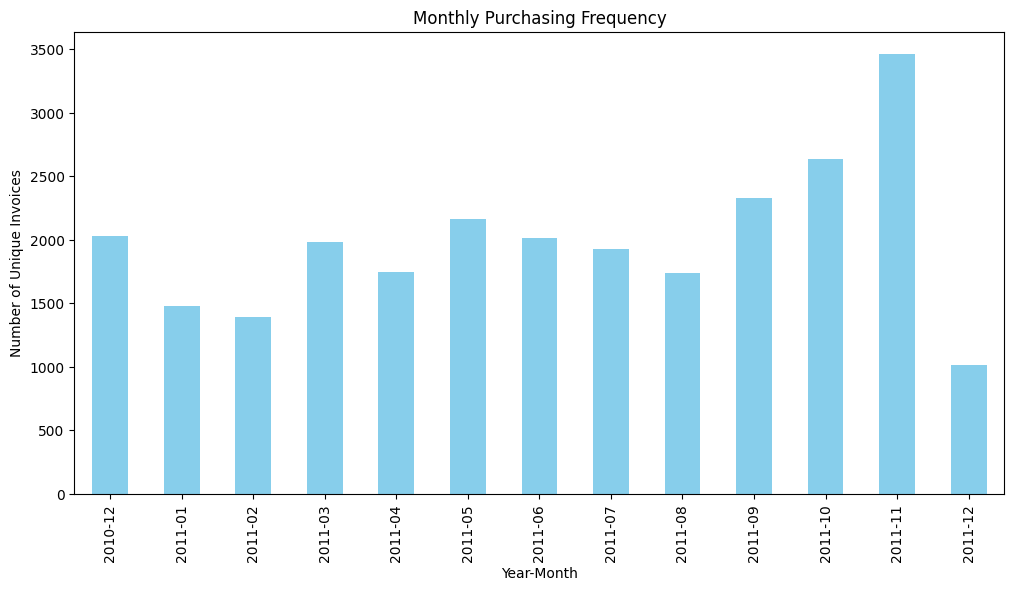

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

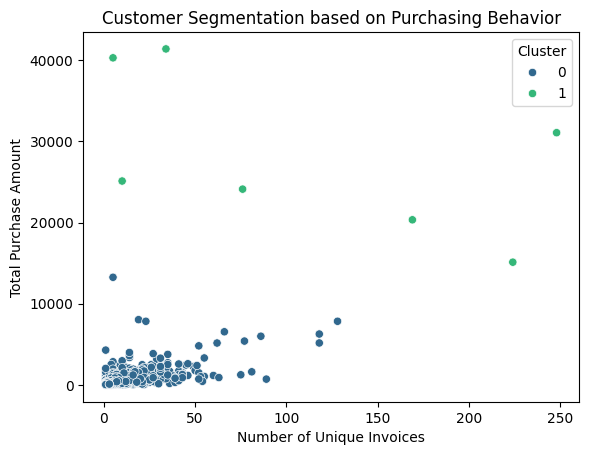

In [28]:
# Install necessary libraries
!pip install pandas matplotlib seaborn scikit-learn

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Explore the dataset
print("Dataset Overview:")
print(data_problem_2.head())
print(data_problem_2.info())

# Useful Insights about Customer Purchasing History
# 1. Identify popular products
popular_products_problem_2 = data_problem_2['Description'].value_counts().head(10)
print("\nPopular Products:")
print(popular_products_problem_2)

# 2. Analyze purchasing frequency over time
data_problem_2['InvoiceDate'] = pd.to_datetime(data_problem_2['InvoiceDate'])
data_problem_2['YearMonth'] = data_problem_2['InvoiceDate'].dt.to_period('M')

monthly_purchase_count = data_problem_2.groupby('YearMonth')['InvoiceNo'].nunique()
plt.figure(figsize=(12, 6))
monthly_purchase_count.plot(kind='bar', color='skyblue')
plt.title('Monthly Purchasing Frequency')
plt.xlabel('Year-Month')
plt.ylabel('Number of Unique Invoices')
plt.show()

# Segment Customers Based on Purchasing Behavior
# Create RFM features (Recency, Frequency, Monetary)
today_problem_2 = max(data_problem_2['InvoiceDate'])
rfm_problem_2 = data_problem_2.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_problem_2 - x.max()).days,
    'InvoiceNo': 'nunique',
    'UnitPrice': 'sum'
})

# Standardize RFM features
scaler_problem_2 = StandardScaler()
rfm_scaled_problem_2 = scaler_problem_2.fit_transform(rfm_problem_2)

# Choose number of clusters using silhouette score
k_values_problem_2 = range(2, 10)
silhouette_scores_problem_2 = []

for k_problem_2 in k_values_problem_2:
    kmeans_problem_2 = KMeans(n_clusters=k_problem_2, random_state=42)
    labels_problem_2 = kmeans_problem_2.fit_predict(rfm_scaled_problem_2)
    silhouette_scores_problem_2.append(silhouette_score(rfm_scaled_problem_2, labels_problem_2))

optimal_k_problem_2 = k_values_problem_2[silhouette_scores_problem_2.index(max(silhouette_scores_problem_2))]

# Fit K-means with optimal clusters
kmeans_problem_2 = KMeans(n_clusters=optimal_k_problem_2, random_state=42)
rfm_problem_2['Cluster'] = kmeans_problem_2.fit_predict(rfm_scaled_problem_2)

# Explore customer segments
sns.scatterplot(x='InvoiceNo', y='UnitPrice', hue='Cluster', data=rfm_problem_2, palette='viridis')
plt.title('Customer Segmentation based on Purchasing Behavior')
plt.xlabel('Number of Unique Invoices')
plt.ylabel('Total Purchase Amount')
plt.show()
